## Data Collection

In [1]:
# Importing packages and customizing display options

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os 
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Reading Census Tract-Level CSV data into a Pandas dataframe and looking at the first 5 rows 

CensusData = pd.read_csv('Data/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv')

CensusData.head(5) 

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,BINGE_Crude95CI,BPHIGH_CrudePrev,BPHIGH_Crude95CI,BPMED_CrudePrev,BPMED_Crude95CI,CANCER_CrudePrev,CANCER_Crude95CI,CASTHMA_CrudePrev,CASTHMA_Crude95CI,CHD_CrudePrev,CHD_Crude95CI,CHECKUP_CrudePrev,CHECKUP_Crude95CI,CHOLSCREEN_CrudePrev,CHOLSCREEN_Crude95CI,COLON_SCREEN_CrudePrev,COLON_SCREEN_Crude95CI,COPD_CrudePrev,COPD_Crude95CI,COREM_CrudePrev,COREM_Crude95CI,COREW_CrudePrev,COREW_Crude95CI,CSMOKING_CrudePrev,CSMOKING_Crude95CI,DENTAL_CrudePrev,DENTAL_Crude95CI,DIABETES_CrudePrev,DIABETES_Crude95CI,HIGHCHOL_CrudePrev,HIGHCHOL_Crude95CI,KIDNEY_CrudePrev,KIDNEY_Crude95CI,LPA_CrudePrev,LPA_Crude95CI,MAMMOUSE_CrudePrev,MAMMOUSE_Crude95CI,MHLTH_CrudePrev,MHLTH_Crude95CI,OBESITY_CrudePrev,OBESITY_Crude95CI,PAPTEST_CrudePrev,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",10.3,"( 9.8, 10.7)",47.7,"(46.6, 48.8)",77.8,"(77.0, 78.6)",5.3,"( 5.0, 5.5)",13.4,"(12.7, 14.3)",7.8,"( 7.3, 8.3)",74.8,"(74.1, 75.5)",78.6,"(77.1, 80.0)",56.8,"(53.5, 59.9)",11.3,"(10.1, 12.5)",29.7,"(25.5, 34.3)",23.2,"(20.4, 26.1)",27.9,"(25.3, 30.6)",42.8,"(39.4, 46.0)",17.4,"(16.6, 18.3)",35.3,"(34.5, 36.2)",4.3,"( 4.0, 4.5)",44.0,"(41.4, 46.5)",82.8,"(80.2, 84.7)",20.5,"(18.9, 22.1)",46.4,"(45.2, 47.5)",85.0,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",10.5,"(10.1, 10.9)",48.2,"(47.1, 49.3)",78.5,"(77.6, 79.3)",4.7,"( 4.6, 4.8)",12.5,"(11.7, 13.3)",8.6,"( 7.9, 9.3)",72.1,"(71.4, 72.8)",76.0,"(74.6, 77.4)",53.8,"(49.7, 57.8)",11.9,"(10.6, 13.2)",26.4,"(22.2, 31.0)",20.9,"(17.7, 25.0)",29.3,"(26.5, 32.0)",39.7,"(36.3, 43.5)",19.8,"(18.6, 20.9)",36.8,"(35.9, 37.7)",4.6,"( 4.3, 4.9)",47.5,"(44.9, 49.9)",83.2,"(80.4, 85.7)",21.2,"(19.6, 22.7)",47.8,"(46.6, 48.9)",83.8,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",10.4,"( 9.9, 11.0)",49.1,"(47.8, 50.4)",79.4,"(78.5, 80.3)",5.3,"( 5.2, 5.5)",13.3,"(12.4, 14.4)",7.5,"( 6.9, 8.2)",76.6,"(75.8, 77.4)",80.2,"(78.5, 82.0)",59.7,"(55.2, 63.9)",10.5,"( 9.2, 12.0)",28.0,"(23.3, 33.4)",23.2,"(19.6, 27.0)",25.9,"(22.8, 29.0)",44.1,"(40.0, 48.0)",18.4,"(17.3, 19.6)",35.6,"(34.5, 36.6)",4.2,"( 4.0, 4.5)",43.0,"(40.0, 45.9)",83.5,"(80.6, 85.9)",18.8,"(17.1, 20.7)",45.7,"(44.3, 46.9)",84.6,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",9.1,"( 8.6, 9.6)",54.1,"(52.7, 55.3)",82.1,"(81.3, 82.9)",6.0,"( 5.8, 6.3)",13.6,"(12.7, 14.7)",9.6,"( 8.7, 10.6)",78.2,"(77.4, 78.9)",80.5,"(78.7, 82.1)",57.9,"(53.4, 62.0)",12.3,"(10.7, 14.0)",24.4,"(18.9, 30.5)",19.8,"(16.0, 23.8)",26.3,"(23.0, 29.4)",39.4,"(35.3, 43.8)",22.4,"(21.1, 23.8)",38.4,"(37.2, 39.5)",5.3,"( 4.9, 5.7)",45.9,"(42.6, 48.9)",83.8,"(81.1, 86.3)",19.4,"(17.7, 21.2)",48.0,"(46.5, 49.3)",84.3,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",7.6,"( 7.1, 8.2)",56.5,"(55.1, 57.8)",81.8,"(80.8, 82.7)",5.9,"( 5.7, 6.2)",14.7,"(13.6, 16.0)",11.4,"(10.4, 12.5)",78.1,"(77.0, 79.1)",77.4,"(75.2, 79.6)",53.2,"(48.8, 57.4)",14.8,"(12.9, 16.8)",21.9,"(16.8, 27.7)",16.7,"(13.3, 20.6)",30.9,"(26.9, 34.5)",

In [3]:
# Reading the CSV files in the 'FoodEnvironmentAtlas' folder into Pandas dataframes 

# Defining folder path to use
folder_path = 'Data/FoodEnvironmentAtlas'

# Creating list of all the CSV files in the folder 
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Creating an empty dictionary to store the dataframes 
FoodAtlasDFs = {}

# Reading CSV files into Pandas dataframes and storing them in the dictionary
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    FoodAtlasDFs[csv_file] = pd.read_csv(file_path)

# Printing out the names of the dataframes as they're stored in the dictionary 
FoodAtlasDFs.keys()

dict_keys(['SupplementalDataCounty.csv', 'SupplementalDataState.csv', 'StateAndCountyData.csv', 'VariableList.csv'])

In [4]:
# Extracting dataframes from the dictionary so I can reference them directly 

SupplementalCountyData, SupplementalStateData, StateAndCountyData, VariableList = FoodAtlasDFs.values()

In [5]:
# Looking at the first 5 rows for the main state and county data 

StateAndCountyData.head(5)

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


In [6]:
# Looking at the first 5 rows for the variable list data 

VariableList.head(5)

,Variable_Name,Category_Name,Category_Code,Subcategory_Name,Variable_Code,Geography,Units
0,"Population, low access to store, 2010",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP10,CNTY10,Count
1,"Population, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP15,CNTY10,Count
2,"Population, low access to store (% change), 2010 -15",Access and Proximity to Grocery Store,ACCESS,Overall,PCH_LACCESS_POP_10_15,CNTY10,% change
3,"Population, low access to store (%), 2010",Access and Proximity to Grocery Store,ACCESS,Overall,PCT_LACCESS_POP10,CNTY10,Percent
4,"Population, low access to store (%), 2015",Access and Proximity to Grocery Store,ACCESS,Overall,PCT_LACCESS_POP15,CNTY10,Percent


In [7]:
# Looking at the first 5 rows for the supplemental state data 

SupplementalStateData.head(5) 

,State_FIPS,State,Variable_Code,Value
0,1,AL,WIC_PART_2012,141899.8333
1,1,AL,WIC_PART_2013,139000.5000
2,1,AL,WIC_PART_2014,131046.2500
3,1,AL,WIC_PART_2015,132132.7500
4,1,AL,WIC_PART_2016,129159.9167


In [8]:
# Looking at the first 5 rows for the supplemental county data 

SupplementalCountyData.head(5) 

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga County,2010_Census_Population,54571
1,1001,AL,Autauga County,Population_Estimate_2011,55208
2,1001,AL,Autauga County,Population_Estimate_2012,54936
3,1001,AL,Autauga County,Population_Estimate_2013,54713
4,1001,AL,Autauga County,Population_Estimate_2014,54876


## Data Cleaning

In [9]:
# Inspecting 'CensusData' null values and datatypes 

CensusData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27210 entries, 0 to 27209
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               27210 non-null  object 
 1   PlaceName               27210 non-null  object 
 2   PlaceFIPS               27210 non-null  int64  
 3   TractFIPS               27210 non-null  int64  
 4   Place_TractID           27210 non-null  object 
 5   Population2010          27210 non-null  int64  
 6   ACCESS2_CrudePrev       27209 non-null  float64
 7   ACCESS2_Crude95CI       27209 non-null  object 
 8   ARTHRITIS_CrudePrev     27210 non-null  float64
 9   ARTHRITIS_Crude95CI     27210 non-null  object 
 10  BINGE_CrudePrev         27210 non-null  float64
 11  BINGE_Crude95CI         27210 non-null  object 
 12  BPHIGH_CrudePrev        27210 non-null  float64
 13  BPHIGH_Crude95CI        27210 non-null  object 
 14  BPMED_CrudePrev         27210 non-null

**Everything appears to be the correct datatype and there aren't very many null values**  

In [10]:
# Inspecting 'StateAndCountyData' null values and datatypes 

StateAndCountyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852810 entries, 0 to 852809
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   FIPS           852810 non-null  int64  
 1   State          852810 non-null  object 
 2   County         852810 non-null  object 
 3   Variable_Code  852810 non-null  object 
 4   Value          852810 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.5+ MB


**All datatypes are correct and there appear to be no null values**  

**However, on the USDA website where this data came from, it said that some null values are encoded as '-9999', so I'll have to check if there are any '-9999' values so I can convert them to normal null values**  

**I'll have to check for the string version of '-9999' in the object columns and the numeric version in the integer and float columns**  

**I will do this by returning subsets comprised of rows that contain '-9999' values**  

**If the returned dataframes are empty, this means there are no '-9999' values**

In [11]:
# Defining object columns and numeric columns
object_cols = ['State', 'County', 'Variable_Code']
numeric_cols = ['FIPS', 'Value'] 

# Object column check
print('Categorical check: \n')
print(StateAndCountyData[StateAndCountyData == '-9999'].dropna(subset = object_cols, how = 'all'))

# Numeric column check 
print('\nNumeric check: \n')
print(StateAndCountyData[StateAndCountyData == -9999].dropna(subset = numeric_cols, how = 'all'))

Categorical check: 

Empty DataFrame
Columns: [FIPS, State, County, Variable_Code, Value]
Index: []

Numeric check: 

Empty DataFrame
Columns: [FIPS, State, County, Variable_Code, Value]
Index: []


**Since both dataframes are empty, we know that there are no null values encoded as -9999 that the .info() method would have missed**  

**We can now apply the same logic to the supplemental dataframes**

In [12]:
# Inspecting 'SupplementalStateData' null values and datatypes 

SupplementalStateData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_FIPS     2142 non-null   int64  
 1   State          2142 non-null   object 
 2   Variable_Code  2142 non-null   object 
 3   Value          2142 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 67.1+ KB


**Datatypes look correct and there are no null values, but we'll still have to check for '-9999' null values**

In [13]:
# Defining object columns and numeric columns
object_cols = ['State', 'Variable_Code']
numeric_cols = ['State_FIPS', 'Value'] 

# Object column check
print('Categorical check: \n')
print(SupplementalStateData[SupplementalStateData == '-9999'].dropna(subset = object_cols, how = 'all'))

# Numeric column check 
print('\nNumeric check: \n')
print(SupplementalStateData[SupplementalStateData == -9999].dropna(subset = numeric_cols, how = 'all'))

Categorical check: 

Empty DataFrame
Columns: [State_FIPS, State, Variable_Code, Value]
Index: []

Numeric check: 

Empty DataFrame
Columns: [State_FIPS, State, Variable_Code, Value]
Index: []


**Since both dataframes are empty, we know that there are no null values encoded as -9999**

In [14]:
# Inspecting 'SupplementalCountyData' null values and datatypes 

SupplementalCountyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28278 entries, 0 to 28277
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FIPS           28278 non-null  int64 
 1   State          28278 non-null  object
 2   County         28278 non-null  object
 3   Variable_Code  28278 non-null  object
 4   Value          28278 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


**Datatypes look correct and there are no null values, but we'll still have to check for '-9999' null values**

In [15]:
# Defining object columns and numeric columns
object_cols = ['State', 'County', 'Variable_Code']
numeric_cols = ['FIPS', 'Value'] 

# Object colummn check 
print('Categorical check: \n')
print(SupplementalCountyData[SupplementalCountyData == '-9999'].dropna(subset = object_cols, how = 'all'))

# Numeric column check 
print('\nNumeric check: \n')
print(SupplementalCountyData[SupplementalCountyData == -9999].dropna(subset = numeric_cols, how = 'all'))

Categorical check: 

Empty DataFrame
Columns: [FIPS, State, County, Variable_Code, Value]
Index: []

Numeric check: 

Empty DataFrame
Columns: [FIPS, State, County, Variable_Code, Value]
Index: []


**Since both dataframes are empty, we know that there are no null values encoded as -9999**

In [16]:
# Inspecting 'VariableList' null values and datatypes 

VariableList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Variable_Name     281 non-null    object
 1   Category_Name     281 non-null    object
 2   Category_Code     281 non-null    object
 3   Subcategory_Name  281 non-null    object
 4   Variable_Code     281 non-null    object
 5   Geography         281 non-null    object
 6   Units             281 non-null    object
dtypes: object(7)
memory usage: 15.5+ KB


**Datatypes look correct and there are no null values, but we'll still have to check for '-9999' null values**

In [17]:
# Since this dataframe only has object columns we only need to check for the string version of -9999

print(VariableList[VariableList == '-9999'].dropna(how = 'all'))

Empty DataFrame
Columns: [Variable_Name, Category_Name, Category_Code, Subcategory_Name, Variable_Code, Geography, Units]
Index: []


**Since this dataframe is empty, we know that there are no null values encoded as -9999**

**Data cleaning is now complete**

## Where do Seniors Struggle to Access Grocery Stores the Most? 

**Let's look at how the number of senior residents with low access to grocery stores varies by county**

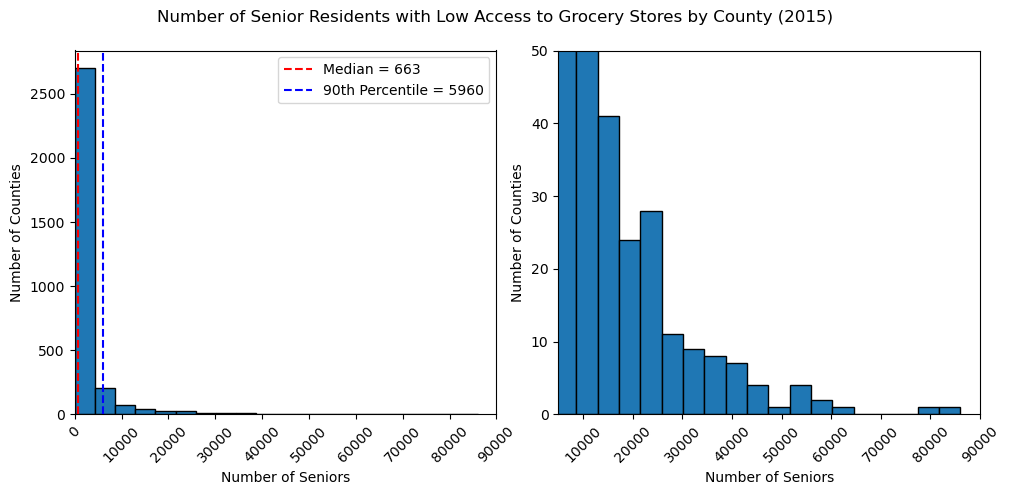

In [18]:
# Creating a histogram that shows the number of senior residents with low access to grocery stores by county (in 2015) 

# Creating a subset of the original 'StateAndCounty' dataframe that contains only information on seniors w/ low access to grocery stores
subset = StateAndCountyData[StateAndCountyData['Variable_Code'] == 'LACCESS_SENIORS15']

# Calculating median and 90th percentiles 
median = np.median(subset['Value'])
pctl_90 = np.percentile(subset['Value'].dropna(), 90)

# Creating plots and customizing their appearances 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

subset['Value'].hist(bins = 20, ax = axes[0], edgecolor = 'black')
axes[0].axvline(median, color = 'red', linestyle = 'dashed', label = f'Median = {math.ceil(median)}')
axes[0].axvline(pctl_90, color = 'blue', linestyle = 'dashed', label = f'90th Percentile = {math.ceil(pctl_90)}')
axes[0].set_ylabel('Number of Counties')
axes[0].set_xlabel('Number of Seniors')
axes[0].set_xlim([0, 90000])
axes[0].tick_params(axis = 'x', rotation = 45)
axes[0].legend()
axes[0].grid(False)

subset['Value'].hist(bins = 20, ax = axes[1], edgecolor = 'black')
axes[1].set_ylabel('Number of Counties')
axes[1].set_xlabel('Number of Seniors')
axes[1].set_xlim([5000, 90000])
axes[1].set_ylim([0, 50])
axes[1].tick_params(axis = 'x', rotation = 45)
axes[1].grid(False)

fig.suptitle('Number of Senior Residents with Low Access to Grocery Stores by County (2015)')

plt.tight_layout()
plt.show()

**The vast majority of counties have between 0 and 5,000 seniors struggling with low access to grocery stores, with the median being only 663 and the 90th percentile being 5,960**  

**Since this distribution is so heavily right-skewed, it is nearly impossible to see what the distribution looks like beyond 10,000 seniors with low access to grocery stores with just the original distribution (left)**

**To be able to visualize the tail of the distribution more clearly, I added the zoomed in view on the right**

**This distribution tells us that there are a handful of counties where there is a very high number of seniors struggling to access grocery stores, and it is in these counties that our program has the most opportunity for positive impact**

**Let's look at the counties with more than 50,000 senior residents with low access to grocery stores**

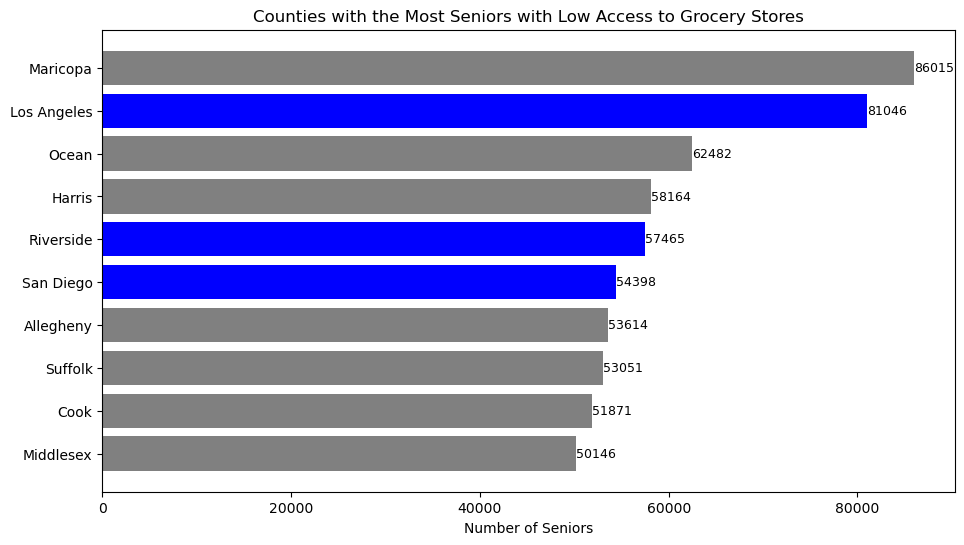

In [19]:
# Filtering the subset down to counties with at least 50,000 senior residents with low access to grocery stores
site_df = subset[(subset['Value'] > 50000)].copy()

# Rounding the values to whole numbers 
site_df['Value'] = site_df['Value'].apply(math.ceil)

# Renaming the value column to a more appropriate title 
site_df.rename(columns={'Value': 'Seniors with Low Access to Grocery Stores'}, inplace=True)

# Defining list of FIPS codes for the three chosen counties 
tri_county_fips = [6037, 6065, 6073]

# Sorting dataframe according to how I want my bar chart to appear
site_df.sort_values(by = 'Seniors with Low Access to Grocery Stores', ascending = True, inplace = True)

# Adding in a color variable so I can highlight the bars of the chosen counties 
site_df['color'] = np.where(site_df['FIPS'].isin(tri_county_fips), 'blue', 'gray')

# Creating bar chart

fig, ax = plt.subplots(figsize=(11, 6))

plt.barh(site_df['County'], width = site_df['Seniors with Low Access to Grocery Stores'], color = site_df['color'])

# Annotating with the values 
for i, value in enumerate(site_df['Seniors with Low Access to Grocery Stores']):
    plt.annotate(value, xy=(value, i), va='center', color = 'black', fontsize = 9)

plt.title('Counties with the Most Seniors with Low Access to Grocery Stores')
plt.xlabel('Number of Seniors')
plt.show()

**3 of the top 10 counties with the most seniors with low access to grocery stores — Los Angeles County, San Diego County, and Riverside County — are all located very close to each other in Southern California, so it makes sense to deploy the program in this tri-county area**

## How Many People Will be Included? How Many Might be Succcessfully Engaged? 

In [20]:
# Calculating how many senior residents with low access to grocery stores live in the tri-county area

senior_population = site_df['Seniors with Low Access to Grocery Stores'].sum()

print(f'Senior low access to grocery stores population: {senior_population}')

Senior low access to grocery stores population: 608252


**There are 608,252 seniors with low access to grocery stores in the tri-county area**

**A paper from the National Center for Health Statistics by Cohen et al. titled 'Demographic Variation in Health Insurance Coverage: United States, 2019' reports that 28% of US adults aged 65 and older are insured through Medicare Advantage, making the maximum number of people our program could engage 170,311 (assuming this same ratio applies to the population of seniors with low access to grocery stores in the tri-county area)**

**We can estimate how many of these people will actually be engaged by our program based on the the percentage of the eligible residents in these counties who participate in a similar program — SNAP (Supplemental Nutrition Assistance Program), a government-sponsored food assistance program**

In [21]:
# Creating a new dataframe that shows the percentage of eligible residents participating in SNAP in the three chosen counties 

# Creating a list of the FIPS codes for the three chosen counties 
tri_fips = [6037, 6065, 6073]

# Filtering 'StateAndCountyData' down to only the three chosen counties
subset = StateAndCountyData[StateAndCountyData['FIPS'].isin(tri_fips)]

# Pivoting the table so that 'SNAP_PART_RATE16' gets its own column 
tri_county_snap = subset.pivot_table(index=['County', 'State', 'FIPS'], columns='Variable_Code', values='Value').reset_index()
tri_county_snap = tri_county_snap[['County', 'State', 'FIPS', 'SNAP_PART_RATE16']]

# Renaming column name from variable code to variable name
tri_county_snap.rename(columns={'SNAP_PART_RATE16': 'SNAP Participation Rate'}, inplace=True)

# Dropping rows where there's any NA's, because performing the pivot_table() method created duplicate rows where the county 
# name was different (LA vs LA County)
tri_county_snap = tri_county_snap.dropna(how = 'any')
tri_county_snap

Variable_Code,County,State,FIPS,SNAP Participation Rate
0,Los Angeles,CA,6037,71.944
2,Riverside,CA,6065,71.944
4,San Diego,CA,6073,71.944


**Given the 72% engagement of eligible residents with SNAP in these counties, we can expect a similar but slightly lower level of engagement with our program, since our program will be new and SNAP has been around for decades**  

**Additionally, given N1's previous accomplishment of driving a "47% increase in a client's contacted members that were successfully referred to a community-based organization that supported their food insecurity," we can expect a boost in engagement on top of the baseline level**  

**To be conservative, let's assume we have a baseline of 50% engagement with our program and see an increase of 30% on top of that**  

**This would mean that our program could engage just over 100,000 (110,702) senior residents in these three counties**

## Which Subgroup of the Population Might Benefit the Most from the Program?

**In order to answer this question, I need to understand the racial and ethnic makeup of the three counties I've selected for the food access program**  

**I can do this using the information provided by my custom-built census race and ethnicity dataset**

In [22]:
# Creating a new dataframe that contains racial data from the table I accessed on census.data.gov

race = {'County': ['National Average', 'Los Angeles County', 'Riverside County', 'San Diego County'], 
                 'PctWhite': [61.2, 29.6, 36.1, 47.9],
                 'PctBlack': [12.1, 7.6, 6.4, 4.7],
                 'PctAmIndAlsk': [1, 1.7, 1.1, 1.2], 
                 'PctAsian': [5.8, 14.8, 6.7, 12],
                 'PctHawPac': [0.2, 0.2, 0.4, 0.4],
                 'PctTwoPlus': [12.6, 20.2, 20.8, 21.8],
                 'PctHispLat': [18.8, 49.1, 51.6, 34.8]}

race = pd.DataFrame(race)

race

,County,PctWhite,PctBlack,PctAmIndAlsk,PctAsian,PctHawPac,PctTwoPlus,PctHispLat
0,National Average,61.2,12.1,1.0,5.8,0.2,12.6,18.8
1,Los Angeles County,29.6,7.6,1.7,14.8,0.2,20.2,49.1
2,Riverside County,36.1,6.4,1.1,6.7,0.4,20.8,51.6
3,San Diego County,47.9,4.7,1.2,12.0,0.4,21.8,34.8


In [23]:
# Calculating tri-county averages 
columns_to_calculate = [col for col in race.columns if col != 'County']
average_values = race.loc[race['County'].isin(['Los Angeles County', 'Riverside County', 'San Diego County'])][columns_to_calculate].mean()

# Creating a new row that contains these averages so I can append it to the dataframe
new_row = {'County': ['Tri-County Area'], 
                 'PctWhite': [average_values['PctWhite']],
                 'PctBlack': [average_values['PctBlack']],
                 'PctAmIndAlsk': [average_values['PctAmIndAlsk']], 
                 'PctAsian': [average_values['PctAsian']],
                 'PctHawPac': [average_values['PctHawPac']],
                 'PctTwoPlus': [average_values['PctTwoPlus']],
                 'PctHispLat': [average_values['PctHispLat']]}

# Converting the new row to a dataframe so I can append it
new_row = pd.DataFrame(new_row)

# Appending the new row to the dataframe 
race = pd.concat([race, new_row], ignore_index=True)

# Dropping individual county rows 
race = race[race['County'].isin(['National Average', 'Tri-County Area'])]

# Rounding values 
race = race.round(2) 

race

,County,PctWhite,PctBlack,PctAmIndAlsk,PctAsian,PctHawPac,PctTwoPlus,PctHispLat
0,National Average,61.20,12.10,1.00,5.80,0.20,12.60,18.80
4,Tri-County Area,37.87,6.23,1.33,11.17,0.33,20.93,45.17


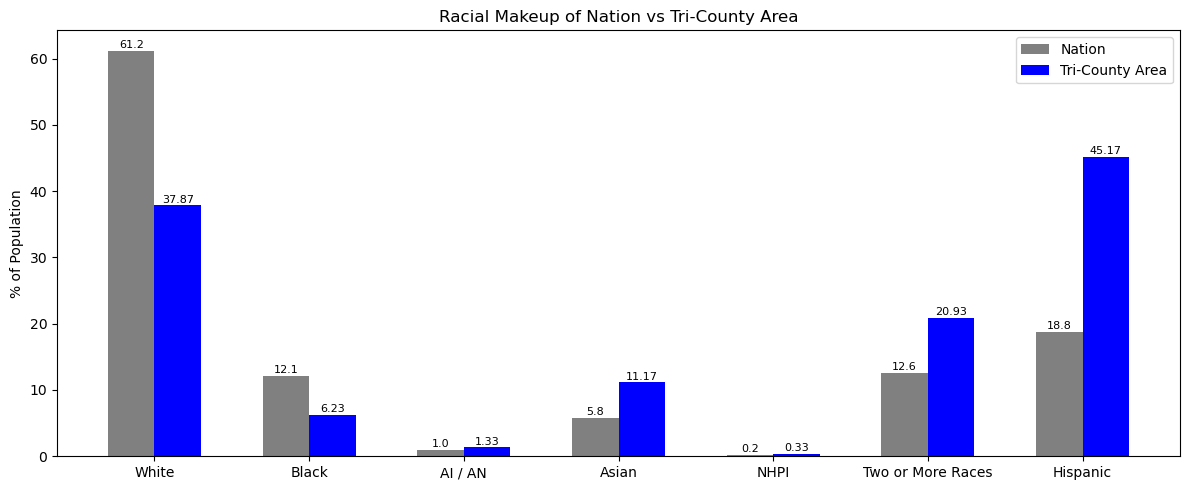

In [24]:
# Creating a paired bar graph comparing racial makeup on national and tri-county levels

# Numbers of pairs of bars 
n = 7

# Specifying values for national bar
national = tuple(race.iloc[0, i] for i in range(1, n + 1))
# Specifying values for tri-county bar 
tricounty = tuple(race.iloc[1, i] for i in range(1, n + 1))

# Positioning the bars on the x-axis
ind = np.arange(n)

# Creating the bar chart 

plt.figure(figsize=(12,5))
width = 0.3       
plt.bar(ind, national , width, label='Nation', color = 'gray')
plt.bar(ind + width, tricounty, width, label='Tri-County Area', color = 'blue')
plt.ylabel('% of Population')
plt.title('Racial Makeup of Nation vs Tri-County Area')

# Annotating with the values 
for i, value in enumerate(national): 
    plt.text(x = i, y = value + 0.1, s = str(value), ha='center', va='bottom', rotation='horizontal', fontsize=8)
for i, value in enumerate(tricounty): 
    plt.text(x = i + width, y = value + 0.1, s = str(value), ha='center', va='bottom', rotation='horizontal', fontsize=8)
    
# Labeling each bar pair
plt.xticks(ind + width / 2, ('White', 'Black', 'AI / AN', 'Asian', 'NHPI', 
                            'Two or More Races', 'Hispanic'))

plt.legend(loc='best')
plt.tight_layout()
plt.show()

**As this graph shows, the tri-county area is home to significantly more Asians, Hispanic people, and people of two or more races**  

**Assuming that these racial and ethnic makeups apply roughly equally to the senior population, it can be expected that the Asian population, Hispanic population, and population of two or more races will benefit the most from this program**

## What is the Projected Impact of the Program? 

**A paper titled 'Association between Household Food Insecurity and Annual Healthcare Costs' by Tarasuk et al. found that "compared with total annual costs in food-secure households, adjusted annual costs were, on average, 16% higher in households with marginal food insecurity, 32% higher in households with moderate food insecurity, and 76% higher in households with severe food insecurity."**  

**Assuming that all of the senior residents in the three chosen counties who have low access to grocery stores and are insured through Medicare Advantage are in the lowest severity food insecurity group (marginal), and our program can successfully engage 65% of them (50% baseline engagement with a 30% boost) and drive them from marginal food insecurity to food security, overall healthcare costs for the healthcare plan in the tri-county area could be reduced by 10.4%**